In [18]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram

hello


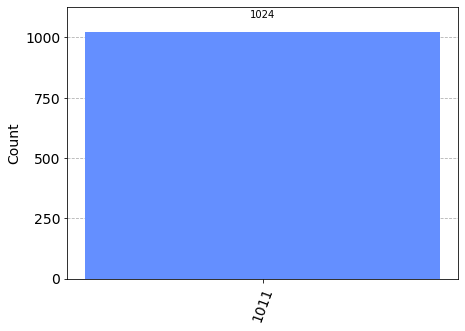

In [21]:
def generalized_cyclic_rotate(qc,kBit,startRange,endRange,times):
    # kbit is bit you want to work with
    # TODO make this log as they want
    # times is the number of times you need to left rotate(2*kbit's location)
    for i in range(times):
        qc.cswap(kBit,startRange,endRange) # swap first two
        for i in range(startRange,endRange-1):
            qc.cswap(kBit,i,i+1)
            
def testSwapper():
    global qc
    qc = QuantumCircuit(4,0)
    qc.x([0,1,2])
    generalized_cyclic_rotate(qc,0,1,3,1)
    print("hello")
    return qc.draw()
testSwapper()
qc.measure_all()

simulator = Aer.get_backend('aer_simulator')
circ = transpile(qc,simulator)
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)


In [6]:
qc = QuantumCircuit(4, 1)

# initialize strings with not gates
# leave room for
# T = "01" and P ="1" => |0 1 01>
qc.x([1,3])
qc.barrier()

# uniform superposition of first register
qc.h(0)
qc.barrier()


# controlled shift (???)
qc.cswap(0,2,3)
qc.barrier()


# XOR between all P bits and the first m bits of T
qc.cnot(1, 2)
qc.barrier()

# Do grovers here


qc.draw()



░ ┌───┐ ░     ░       ░ 
q_0: ──────░─┤ H ├─░──■──░───────░─
     ┌───┐ ░ └───┘ ░  │  ░       ░ 
q_1: ┤ X ├─░───────░──┼──░───■───░─
     └───┘ ░       ░  │  ░ ┌─┴─┐ ░ 
q_2: ──────░───────░──X──░─┤ X ├─░─
     ┌───┐ ░       ░  │  ░ └───┘ ░ 
q_3: ┤ X ├─░───────░──X──░───────░─
     └───┘ ░       ░     ░       ░ 
  c: ══════════════════════════════